https://habr.com/ru/articles/759934/

In [1]:
import pandas as pd
df = pd.read_csv('delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [2]:
X = df.drop(['logS'], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [3]:
y = df.iloc[:,-1]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #Линейная регрессия

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred) 
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred) 
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [9]:
print(lr_train_mse)

1.0139894491573003


In [10]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


#Случайный лес

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [12]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [14]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.050251,0.76127,1.046995,0.759562


In [15]:
pd.concat([lr_results, rf_results])

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
0,Random forest,1.050251,0.76127,1.046995,0.759562


In [16]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pred')

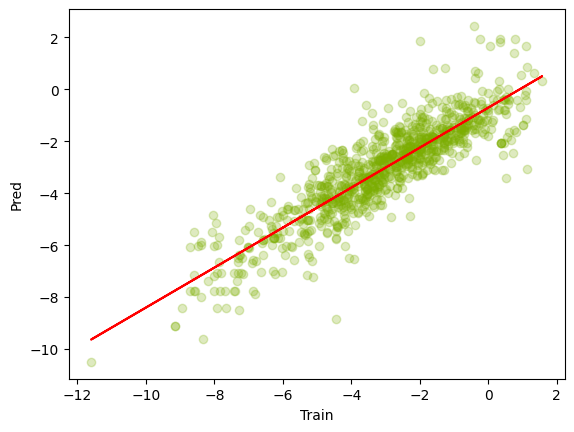

In [67]:
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.25)
model = np.polyfit(x=y_train, y=y_lr_train_pred, deg=1)
trend = np.poly1d(model)
plt.plot(y_train, trend(y_train), c='red')
plt.xlabel('Train')
plt.ylabel('Pred')

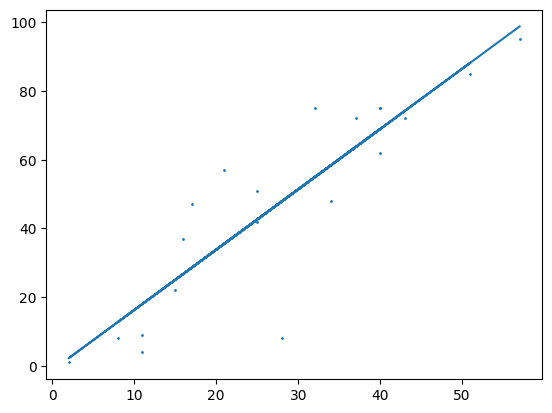

In [65]:
x= [28, 8, 11, 37, 15, 25, 51, 11, 32, 34, 43, 2, 40, 16, 40, 25, 40, 17, 21, 57]
y= [8, 8, 9, 72, 22, 51, 85, 4, 75, 48, 72, 1, 62, 37, 75, 42, 75, 47, 57, 95]
plt.scatter(x, y, 1)
model = np.polyfit(x, y, 1)
trendpoly = np.poly1d(model)
plt.plot(x, trendpoly(x))


In [64]:
model

array([ 1.75505212, -1.27719099])